# ex03-Clip GeoTIFF Data With a Shapefile

It is very rare to carray out an analysis interested in an entire DEM data, which can easily cover hundreds of square miles. Generaly, DEM data come with high spatial resolution and big volume. Given the size of DEM data, we are highly motivated to reduce the size of an image to only our area of interest. The best way to accomplish this reduction is to clip an image to a boundary that defines our study area. We can use shapefiles (or other vector data) as our boundary definition and basically get rid of all the data outside that boundary. Such doing is useful as it:

- Makes the data smaller and

- Makes processing and plotting faster.

This time, the DEMO data is not real DEM data. We take land-cover Data from Global Land Cover - SHARE [(GLC-SHARE)](http://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1036355/) as a fake DEM data. The Global Land Cover-SHARE (GLC-SHARE) is a global land cover database with spatial resolution of 30 arc-seconds (~1 sq.km). And we only use the land cover class eof ***cropland (02)*** as an example. The data are made available in ***GeoTIFF*** Format in the World Geodetic System 1984 (WGS 84) coordinate system through the [FAO Geonetwork site](http://www.fao.org/geonetwork/srv/en/main.home?uuid=ba4526fd-cdbf-4028-a1bd-5a559c4bff38).

In this notebook, xarray backended with rasterio are still used to read and preprocess data, while the python package of salem is used to clip the data to the target area of Brazil. [Salem](https://salem.readthedocs.io/en/v0.2.3/) is a small library to do geoscientific data processing and plotting. It extends xarray to add geolocalised subsetting, masking, and plotting operations to xarray’s DataArray and DataSet structures.

It is worth note that the raster data and shapefile must be in the same spatial projection before carring out clipping. For example, both raster and shapefile have the projection  of EPSG:4326.

In [1]:
%matplotlib inline

import numpy as np
import xarray as xr

import salem
from salem.utils import get_demo_file
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set some parameters to apply to all plots. These can be overridden
import matplotlib
# Plot size to 12" x 7"
matplotlib.rc('figure', figsize = (15, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = True, right = True)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

## 1. Read data

In [3]:
infile  = 'data/GlcShare_v10_02/glc_shv10_02.Tif'
da_crop = xr.open_rasterio(infile).drop('band')[0].rename({'x':'longitude', 'y':'latitude'})

da_crop = da_crop.where(da_crop>0, np.nan)

## 2. Clip GeoTIFF to Target

Take Brazil as target area and prepare Brazil shapefile.

In [4]:
shdf = salem.read_shapefile(get_demo_file('world_borders.shp'))
shdf = shdf.loc[shdf['CNTRY_NAME'].isin(['Brazil'])] 

***Mask Brazil***

In [5]:
t2_sub = da_crop.salem.subset(shape=shdf, margin=0)
t2_roi = t2_sub.salem.roi(shape=shdf)

## 3. Visualize the crop distribution in Brazil

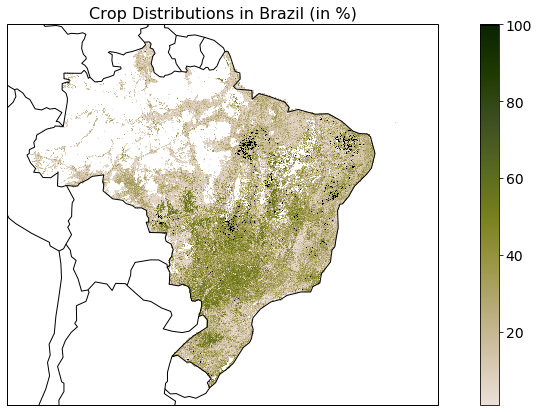

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-60))
t2_roi.plot(ax=ax, 
            transform=ccrs.PlateCarree(),            
           )

ax.add_feature(cfeature.BORDERS)
ax.coastlines()
ax.axis('off')
_ = ax.set_title('Crop Distributions in Brazil (in %)', fontsize=16)

## References

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006).

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007), DOI:10.1109/MCSE.2007.53

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

https://pro.arcgis.com/en/pro-app/tool-reference/data-management/clip.htm

https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/

https://rasterio.readthedocs.io/en/stable/

http://xarray.pydata.org/en/stable/

https://scitools.org.uk/cartopy/docs/latest/

https://salem.readthedocs.io/en/v0.2.3/index.html

http://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1036355/